<a href="https://colab.research.google.com/github/haley4k/ijbag/blob/main/Thermo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Refridgeration Cycle!

Date: 3 Dec 2024

Group member 1:
- Name: Kim, Haley
- University ID: 1872494
- Email: haleykim@berkeley.edu

Group member 2:
- Name: Wu, Vanessa
- University ID: 1883324
- Email: vanessaw@berkeley.edu

-------

## Summary and Problem Statement (200 words maximum)
To address the dual challenges of minimizing refrigerants with high global warming potential and enhancing the COP of refrigerators to lower electricity consumption, researchers have focused on developing refrigeration systems with alternative refrigerants.

The majority of refrigerators utilize R-134a as its refrigerant due to its lack of toxicity and flammability. However, it is a high contributor to greenhouse gas emissions. A potential set of refrigerant alternatives are ammonia and CO2, which both provide low emissions. However both have their faults. Ammonia is highly effective in acting as a refrigerant due to its ability to absorb and release heat. However, it is highly toxic in the proximity of food. Meanwhile, CO2 is safe, but it absorbs heat less efficiently than ammonia. Therefore, a cascade system, in which CO2, is used to cool the food, while ammonia cools the CO2 can create a more efficient system, which is also environmentally friendly.

Can you design a cascade refrigeration cycle, which utilizes CO2 as the cool, lower cycle and ammonia as the hot, upper cycle, that optimizes the cycle’s COP?


-------

## Background information (250 words maximum)
Cascade refrigeration systems represent a great possibility when approaching environmentally friendly cooling. Unlike single fluid cycles, cascade cycles allow for the use of two separate refrigerant fluids to move, allowing for more effective cooling. This method allows for potential optimization of refrigeration COP.

####Cascade Refrigeration Cycles
- How it works: A cascade refrigeration cycle utilizes two single cycles. The lower, cooler cycle utilizes a heat exchanger to act as its condenser. Meanwhile, the upper, hotter cycle uses the heat exchanger as its evaporator.
- Function: Each heat pump cycle, within the cascade system can utilize different refrigerants, which allows for varying the conditions of the temperature within the cycle, which improves the overall performance of the system.

####Properties of Ammonia as a Refrigerant:
- High Latent Heat: Ammonia can absorb large amounts of heat while evaporating, which helps with cooling.
- Toxicity: Due to its corrosive nature, ammonia is not ideal when interacting in systems involving food.

####Properties of Carbon Dioxide as a Refrigerant:
- Environment: Carbon Dioxide as a refrigerant has a low GWP, meaning that it is very environmentally friendly.
- Toxicity: Carbon Dioxide is a non toxic and non flammable refrigerant, making it ideal around food.

####Challenges and Future Prospects
- While cascade refrigeration offers numerous advantages, several challenges need to be addressed:
Ammonia Condenser Temperature: In order to create a system that is environmentally friendly, the temperature exiting the upper cycle’s condenser has to be similar to the region’s average temperature, limiting the other states throughout the system.



-------

# **Modeling the Thermodynamic Process**



In [25]:
!pip install CoolProp
from CoolProp.CoolProp import PropsSI

States 1-4 follow the CO2 refridgerant. States 5-8 follow NH3.

In [26]:
fluid1 = 'CarbonDioxide'
fluid2 = 'Ammonia'

## Process 4-1: Isobaric Evaporator

The evaporator absorbs heat from the surroundings and adds that heat to the CO2. The CO2 leaves the evaporator with a temperature of -20°C (as given in the project statement) as a saturated gas to the compressor.

In [27]:
T1 = -20 + 273
Q1 = 1
H1 = PropsSI('H','T',T1,'Q',Q1,fluid1)
S1 = PropsSI('S','T',T1,'Q',Q1,fluid1)
P1 = PropsSI('P','T',T1,'Q',Q1,fluid1)

## Process 1-2 : Isentropic Compressor

The compressor increases the temperature of CO2 to -10°C by increasing its pressure. The -10°C was found through researching the average temperature in a medium-stage compressor in a CO2 refrigeration system [(source)](https://www.scmfrigo.com/en/blog/co2-refrigeration-system-how-it-works/). Entropy stays constant because of the isentropic property.

In [28]:
S2 = S1
T2 = -10 + 273
Q2 = PropsSI('Q','T',T2,'S',S1,fluid1)
H2 = PropsSI('H','T',T2,'S',S1,fluid1)
P2 = PropsSI('P','T',T2,'S',S1, fluid1)

## Process 2-3: Isobaric Condenser / Heat Exchanger

The CO2 enters the condenser which removes heat and condenses it to a saturated liquid. So the CO2 exits with a quality of 1 and a lower temperature, pressure stays constant because of the isobaric property.

In [29]:
P3 = P2
Q3 = 0
H3 = PropsSI('H','P',P3,'Q',Q3,fluid1)
S3 = PropsSI('S','P',P3,'Q',Q3,fluid1)
T3 = PropsSI('T','P',P3,'Q',Q3,fluid1)

## Process 3-4: Isenthalpic Expansion Valve

The CO2 enters the expansion value releives the pressure. The gas/liquid CO2 mixture is sent to the evaporator. And the CO2 cycle continues. Entropy stays constant because of the isenthalpic property.

In [30]:
P4 = P1
H4 = H3
S4 = PropsSI('S','P',P4,'H',H4,fluid1)
T4 = PropsSI('T','P',P4,'H',H4,fluid1)
Q4 = PropsSI('Q','P',P4,'H',H4,fluid1)

## Process 6-7: Isobaric Condenser

The condenser removes heat from the NH3 which causes a decrease in the temperature to 14°C and converts it to a saturated liquid. The 14°C was derived from the average east bay area temperature during winter [(source)](https://www.localconditions.com/weather-berkeley-california/94701/#:~:text=Berkeley%2C%20CA%20weather%20report&text=The%20barometric%20pressure%20is%2030.17,point%20is%2051%20degrees%20fahrenheit.). We chose this number to be mindful of the excess heat released into the environment for thermal pollution.

In [31]:
T7 = 14 + 273
Q7 = 0
H7 = PropsSI('H','Q',Q7,'T',T7,fluid2)
S7 = PropsSI('S','Q',Q7,'T',T7,fluid2)
P7 = PropsSI('P','Q',Q7,'T',T7,fluid2)

## Process 7-8: Isenthalpic Expansion Valve

The NH3 enters the expansion value decreases the pressure to 200,000 Pa (2 bar). This was derived from the Ammonia Pressure-Temperature graph, for the pressure that correlates with temperatures lower than T3 = 14.9°C, and found a value under the curve since it is a saturated vapor. We are stating the T8 must be greater than T3 because the heat removed from T2 to T3 is added to T8 to become T5.

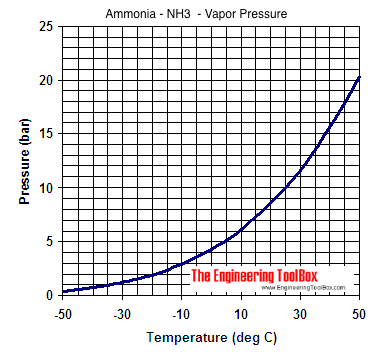

In [32]:
P8 = 200000
H8 = H7
S8 = PropsSI('S','P',P8,'H',H8,fluid2)
T8 = PropsSI('T','P',P8,'H',H8,fluid2)
Q8 = PropsSI('Q','P',P8,'H',H8,fluid2)

## Process 8-5: Isobaric Evaporator / Heat Exchanger

The evaporator acts as a heat exchanger absorbs heat from the CO2 and adds that heat to the NH3. The NH3 leaves the evaporator as a saturated gas.

In [33]:
T5 = T8
Q5 = 1
H5 = PropsSI('H','T',T5,'Q',Q5,fluid2)
S5 = PropsSI('S','T',T5,'Q',Q5,fluid2)
P5 = PropsSI('P','T',T5,'Q',Q5,fluid2)

## Process 5-6: Isentropic Compressor

The compressor increases the temperature of NH3 by increasing the pressure. We use the pressure of P6 found earlier, since the condenser (process 6-7) was adiabatic.

In [34]:
S6 = S5
P6 = P7
Q6 = PropsSI('Q','P',P6,'S',S6,fluid2)
H6 = PropsSI('H','P',P6,'S',S6,fluid2)
T6 = PropsSI('T','P',P6,'S',S6,fluid2)

-------

# Determining the COP
The upper NH3 cycle is the A cycle. The lower CO2 is the B cycle.



In [35]:
mdotA_kgPerS = 0.05
QAL_W = mdotA_kgPerS*(H5 - H8)
WAin_W = mdotA_kgPerS*(H6 - H5)
QAH_W = mdotA_kgPerS*(H6 - H7)

COP = QAL_W/WAin_W

QBH_W = -QAL_W
mdotB_kgPerS = QBH_W/(H3 - H2)
QBL_W = mdotB_kgPerS *(H1 - H4)
WdotIn_W = mdotA_kgPerS *(H6 - H5) + mdotB_kgPerS * (H2 - H1)

COP_R = QBL_W/WdotIn_W
print('The COP of the cascade refrigeration cycle is {0:1.3f}.'.format(COP_R))

The COP of the cascade refrigeration cycle is 5.805.


-----

## Improving the performance

One way to improve the performance is to change the temperature of the CO2 compressor. We found that decreasing the temperature, the COP is higher.

In [36]:
S2 = S1
T2 = -15 + 273
Q2 = PropsSI('Q','T',T2,'S',S1,fluid1)
H2 = PropsSI('H','T',T2,'S',S1,fluid1)
P2 = PropsSI('P','T',T2,'S',S1, fluid1)

The following lines of code are the same but just need to be updated with the new temperature value.

In [37]:
P3 = P2
Q3 = 0
H3 = PropsSI('H','P',P3,'Q',Q3,fluid1)
S3 = PropsSI('S','P',P3,'Q',Q3,fluid1)
T3 = PropsSI('T','P',P3,'Q',Q3,fluid1)

P4 = P1
H4 = H3
S4 = PropsSI('S','P',P4,'H',H4,fluid1)
T4 = PropsSI('T','P',P4,'H',H4,fluid1)
Q4 = PropsSI('Q','P',P4,'H',H4,fluid1)

mdotA_kgPerS = 0.05
QAL_W = mdotA_kgPerS*(H5 - H8)
WAin_W = mdotA_kgPerS*(H6 - H5)
QAH_W = mdotA_kgPerS*(H6 - H7)

COP = QAL_W/WAin_W

QBH_W = -QAL_W
mdotB_kgPerS = QBH_W/(H3 - H2)
QBL_W = mdotB_kgPerS *(H1 - H4)
WdotIn_W = mdotA_kgPerS *(H6 - H5) + mdotB_kgPerS * (H2 - H1)

COP_R = QBL_W/WdotIn_W
print('The COP of the cascade refrigeration cycle is {0:1.3f}.'.format(COP_R))

The COP of the cascade refrigeration cycle is 6.273.


----

## Conclusions (150 words max)

In the process of creating our cascade refrigerant cycle, the variable that we altered in order to optimize the COP was T2. The COP that we resulted in from the cascade refrigerant cycle was 5.805. When creating a single cycle with carbon dioxide, it results in a COP of 6.798. In comparison to a single working fluid’s cycle, the cascade cycle including both carbon dioxide and ammonia creates a higher COP. When we reached our COP, we ensured that temperature released into the environment from ammonia’s compressor remained below the east bay average temperature of 14॰C, to mitigate environmental impacts from our refrigeration system. In the case of our refrigeration system, we are considering the temperature needed to store Kimchi, which is between 0 and 4॰C. Due to the carbon dioxide’s temperature being maintained at -20॰C, the refrigerator would prove effective for our application.


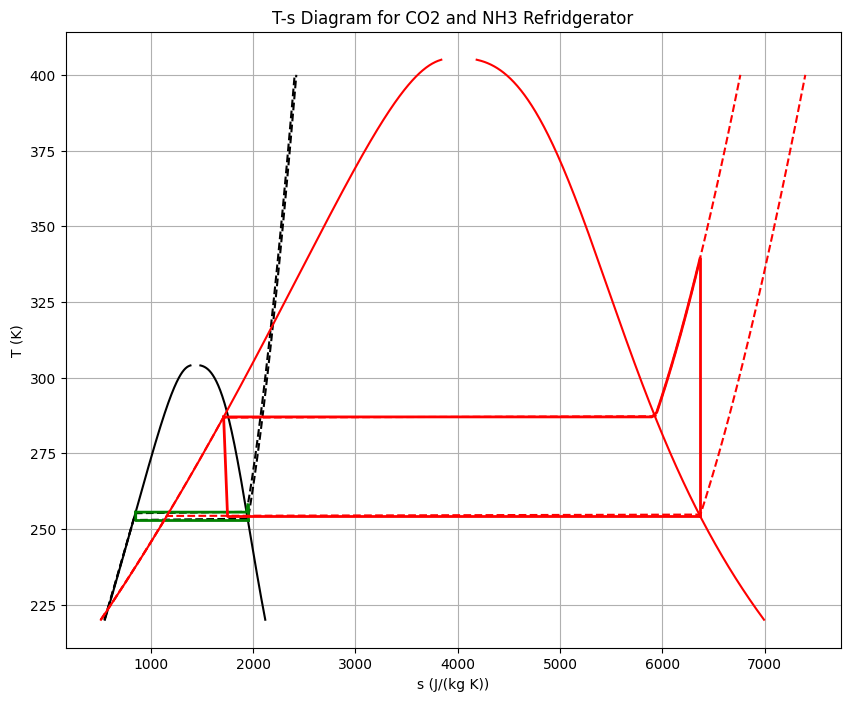

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

T = np.linspace(220, 400, 400)
for P in [P1, P2]:
    S = [PropsSI('S', 'P', P, 'T', t, fluid1) for t in T]
    plt.plot(S, T, 'k--')
Tsat = np.linspace(220, 304, 1000)
svap = [PropsSI('S', 'T', t, 'Q', 1, fluid1) for t in Tsat]
sliq = [PropsSI('S', 'T', t, 'Q', 0, fluid1) for t in Tsat]
S23 = np.linspace(S2, S3, 100)
T23 = [PropsSI('T', 'P', P2, 'S', s, fluid1) for s in S23]
T41 = np.linspace(T4, T1, 100)
Q41 = np.linspace(Q4, Q1, 100)
S41 = [PropsSI('S', 'P', P1, 'Q', q, fluid1) for q in Q41]
plt.plot(svap, Tsat, 'k-')
plt.plot(sliq, Tsat, 'k-')
plt.plot([S1, S2], [T1, T2], 'g-', lw=2)
plt.plot(S23, T23, 'g-', lw=2)
plt.plot([S3, S4], [T3, T4], 'g-', lw=2)
plt.plot(S41, T41, 'g-', lw=2)

TB = np.linspace(220, 400, 400)
for P in [P5, P6]:
    S = [PropsSI('S', 'P', P, 'T', t, fluid2) for t in TB]
    plt.plot(S, TB, 'r--')
TsatB = np.linspace(220, 405, 1000)
svapB = [PropsSI('S', 'T', t, 'Q', 1, fluid2) for t in TsatB]
sliqB = [PropsSI('S', 'T', t, 'Q', 0, fluid2) for t in TsatB]
S67 = np.linspace(S6, S7, 100)
T67 = [PropsSI('T', 'P', P6, 'S', s, fluid2) for s in S67]
T85 = np.linspace(T8, T5, 100)
Q85 = np.linspace(Q8, Q5, 100)
S85 = [PropsSI('S', 'P', P8, 'Q', q, fluid2) for q in Q85]
plt.plot(svapB, TsatB, 'r-')
plt.plot(sliqB, TsatB, 'r-')
plt.plot([S5, S6], [T5, T6], 'r-', lw=2)
plt.plot(S67, T67, 'r-', lw=2)
plt.plot([S7, S8], [T7, T8], 'r-', lw=2)
plt.plot(S85, T85, 'r-', lw=2)

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
plt.title('T-s Diagram for CO2 and NH3 Refridgerator')
plt.grid()
plt.show()